In [3]:
import pandas as pd
df = pd.read_csv('twitter_training.csv')

In [4]:
print(df.head())
print(df.info())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Po

In [6]:
print(df.columns)

Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


In [7]:
df.columns = ['ID', 'Topic', 'Sentiment', 'Text']

In [8]:
print(df.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [9]:
df.drop_duplicates(subset=['Text'], inplace=True)


In [10]:
df.dropna(subset=['Text'], inplace=True)

In [12]:
pip install textblob


     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------- --------- 30.7/41.5 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 41.5/41.5 kB 666.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ------ --------------------------------- 102.4/626.3 kB 3.0 MB/s eta 0:00:01
   ------------------------- -------------- 399.4/626.3 kB 5.0 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   --------- ------------------------------ 0.4/1.5 MB 11.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 10.0 MB/s eta 0:00:01
   ------------------------------- -------- 1.2/1.5 MB 9.4 MB/s eta 0:00:01
   ---------------------------------------  1.5/1.5 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 8.7 MB/s eta 0:00:00
   ---

In [13]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Razi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Razi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [14]:
from textblob import TextBlob


In [15]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity 

In [16]:
df['Calculated_Sentiment'] = df['Text'].apply(analyze_sentiment)

In [17]:
print(df.head())

     ID        Topic Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  Calculated_Sentiment  
0  I am coming to the borders and I will kill you...                   0.0  
1  im getting on borderlands and i will kill you ...                   0.0  
2  im coming on borderlands and i will murder you...                   0.0  
3  im getting on borderlands 2 and i will murder ...                   0.0  
4  im getting into borderlands and i can murder y...                   0.0  


In [18]:
import matplotlib.pyplot as plt

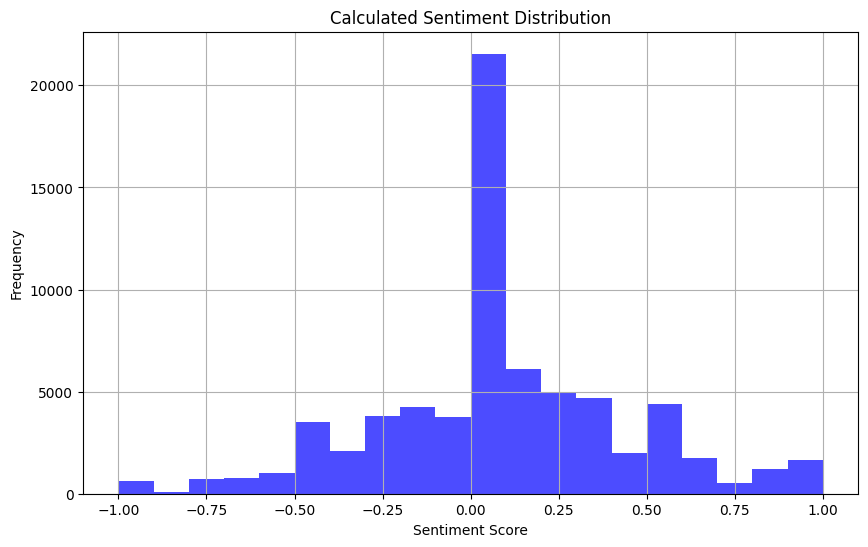

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['Calculated_Sentiment'], bins=20, color='blue', alpha=0.7)
plt.title('Calculated Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()